In [1]:
import os
os.chdir("C:\\Users\\vikas\\Desktop\\PythonML")
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [ ]:
#K= sqrt(x-x1)2 + (y-y1)2

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

In [7]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
#Preprocessing
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [15]:
#Train Test Split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [18]:
#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
y_pred = classifier.predict(X_test) 

In [20]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [21]:
#Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

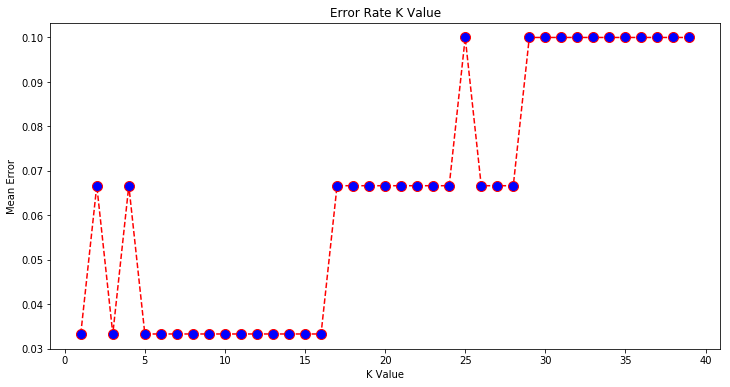

In [22]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  